In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.linalg import hankel

from embedding import create_embedding
from svd import find_eig
from projection import project_onto_signal_subspace
from threshold import find_threshold
from plot import plot_stuff

In [48]:
xmeas = np.asarray(pd.read_csv('../Dataset/TE/1-Scenario DA1/xmv10_359_data_1.csv', usecols=[14], header=None))

In [49]:
print(xmeas)
print(xmeas.shape)

[[50.095]
 [48.633]
 [50.497]
 ...
 [64.971]
 [62.78 ]
 [63.63 ]]
(4801, 1)


In [50]:
X_train_data = xmeas[:500]
X_theta = xmeas[250:2000]
X_test = xmeas[1750:]

In [51]:
X_train, L = create_embedding(X_train_data)

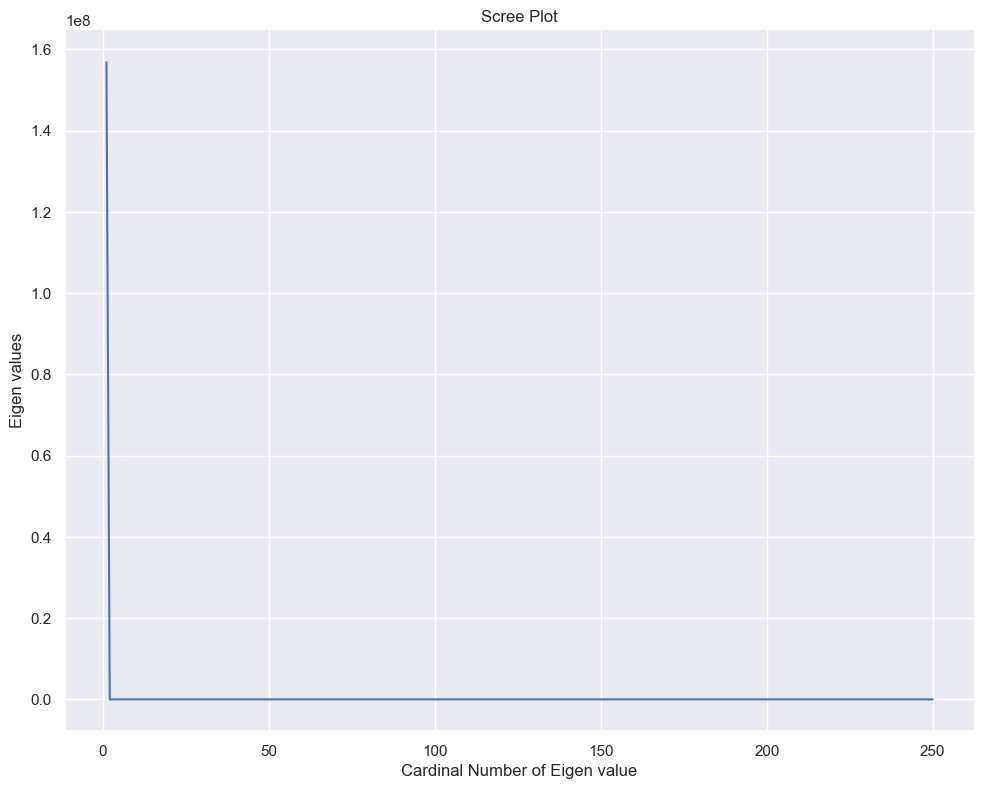

In [52]:
eigenValues, eigenVectors = find_eig(X_train)

Text(0.5, 1.02, 'Scree Plot')

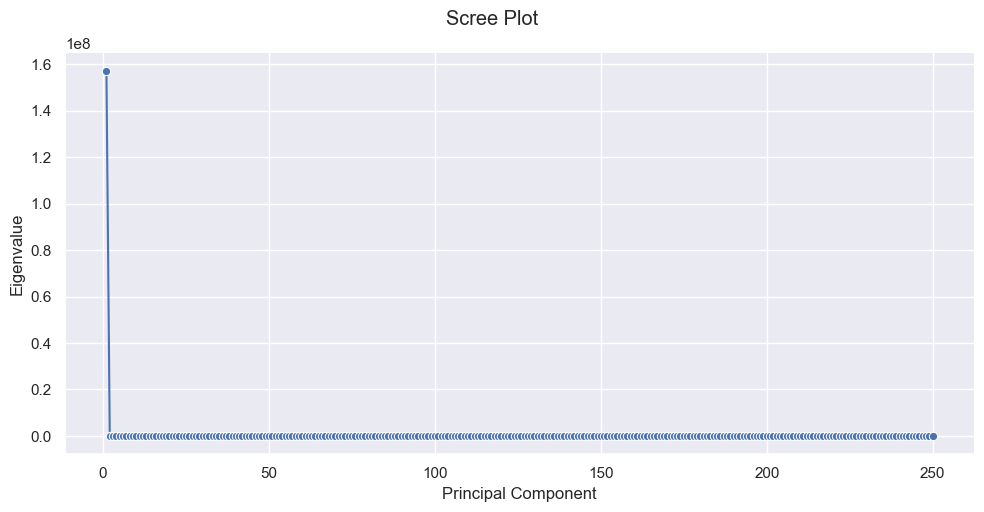

In [53]:
temp_df = pd.DataFrame({
    'Principal Component': range(1, len(eigenValues) + 1),
    'Eigenvalue': eigenValues
})

sns.set_theme()

plot = sns.relplot(data=temp_df, x='Principal Component', y='Eigenvalue', kind='line', marker='o', height=5, aspect=2)

plot.set_axis_labels("Principal Component", "Eigenvalue")
plot.figure.suptitle("Scree Plot", y=1.02)

In [54]:
eigenVectors

array([[ 0.06341701,  0.03432969,  0.06279095, ..., -0.09708467,
        -0.03501145, -0.14089125],
       [ 0.06342069,  0.06385673,  0.05920814, ...,  0.14027991,
         0.0440235 , -0.03785947],
       [ 0.06341915,  0.05555015,  0.05250671, ..., -0.07605447,
         0.08184961,  0.04343105],
       ...,
       [ 0.06314954, -0.08764804, -0.09364506, ..., -0.13090067,
         0.03294406,  0.01196499],
       [ 0.06314686, -0.11204398, -0.07470396, ...,  0.01358557,
        -0.19007864, -0.20293381],
       [ 0.06315493, -0.11590776, -0.03962675, ...,  0.07006919,
         0.16429674, -0.21785507]])

In [55]:
r = 1

In [56]:
centroid, pX, U, X_train_extracted_data = project_onto_signal_subspace(X_train, eigenVectors, r)

In [57]:
dtest_theta, dtrain_scores, dtest_scores = find_threshold(X_train_data, X_theta, U, centroid, L)

In [58]:
print(dtest_theta)

4.211586236637231


In [59]:
Xj = hankel(X_test[:L], X_test[L-1:])
UT = U.T
pXj = np.matmul(UT, Xj)
dj_matrix = centroid - pXj
dj_scores = np.linalg.norm(dj_matrix, axis=0, ord=2)
dj_scores = np.asarray(dj_scores)
np.max(dj_scores)

np.float64(71.81464482846559)

In [60]:
dtest_scores.shape

(1501,)

(2, 2) (2, 2) (1, 1)


c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(list(range(0, len(xmeas) + 100, 10)))
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\Assignments\PASAD\Implementation\plot.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(xlables)


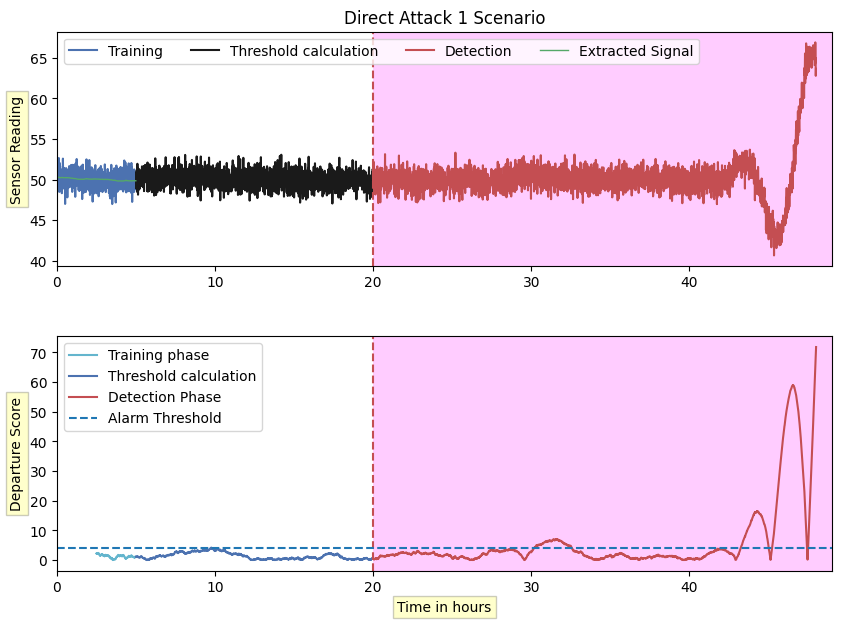

In [61]:
plot_stuff(xmeas, X_train_extracted_data, dtrain_scores, dtest_scores, dj_scores, dtest_theta, L)